# Ejercicio 1
Genere una señal $s(t) = \sin (2\pi f_1 t)+4 \sin (2\pi f_2 t)$, con $f_1 = 10$ Hz $f_2 = 20$ Hz y obtenga su versión discreta $s[n]$ con período de muestreo $T = 0,001 s $ en el intervalo de tiempo $ t = [0 . . . 1) s $. A continuación:
1. Calcule la TDF $S[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $S[k]$.
2. Verifique la relación de Parseval para la TDF: $$E_s = \sum_{n=1}^{N} s[n]^2 = \dfrac{1}{N}\sum_{k=1}^{N} |S[k]|^2$$donde $N$ es la cantidad de muestras de $s[n]$.


Realice los siguientes cambios y analice los resultados obtenidos: 
1. Modifique $s[n]$ de forma tal que: $$s[n] = \sin(2\pi f_1t) + 4 \sin(2\pi f_2t) + 4$$ y analice los cambios en el espectro de magnitud de S[k].

2. Modifique las frecuencias de las señales seno de forma tal que $f_1 = 10$ Hz y $f_2 = 11$ Hz y analice los cambios en el espectro de magnitud de $S[k]$.

3. Modifique nuevamente las frecuencias de las señales seno de forma tal que $f_1 = 10$ Hz y $f_2 = 10,5$ Hz. ¿Qué ocurre en el espectro de magnitud de $S[k]$?

4. Modifique el intervalo de tiempo de análisis de la siguiente manera $t = [0 . . . 2) seg$. y analice los cambios en la TDF.

Energía en tiempo: 8500.0
Energía en frecuencia: 8500.0


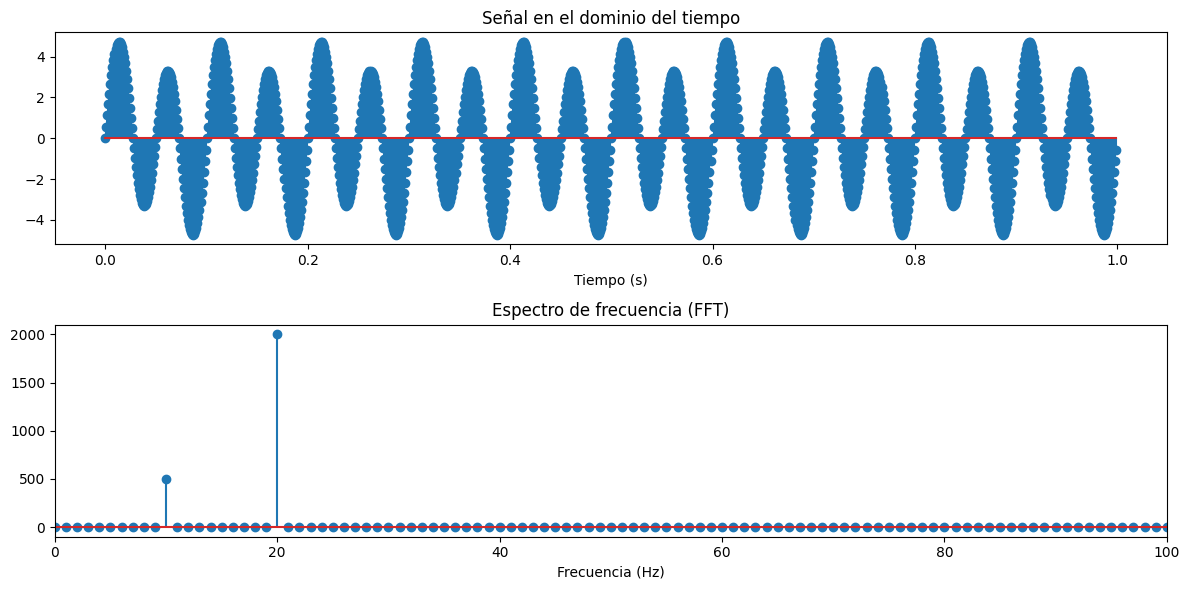

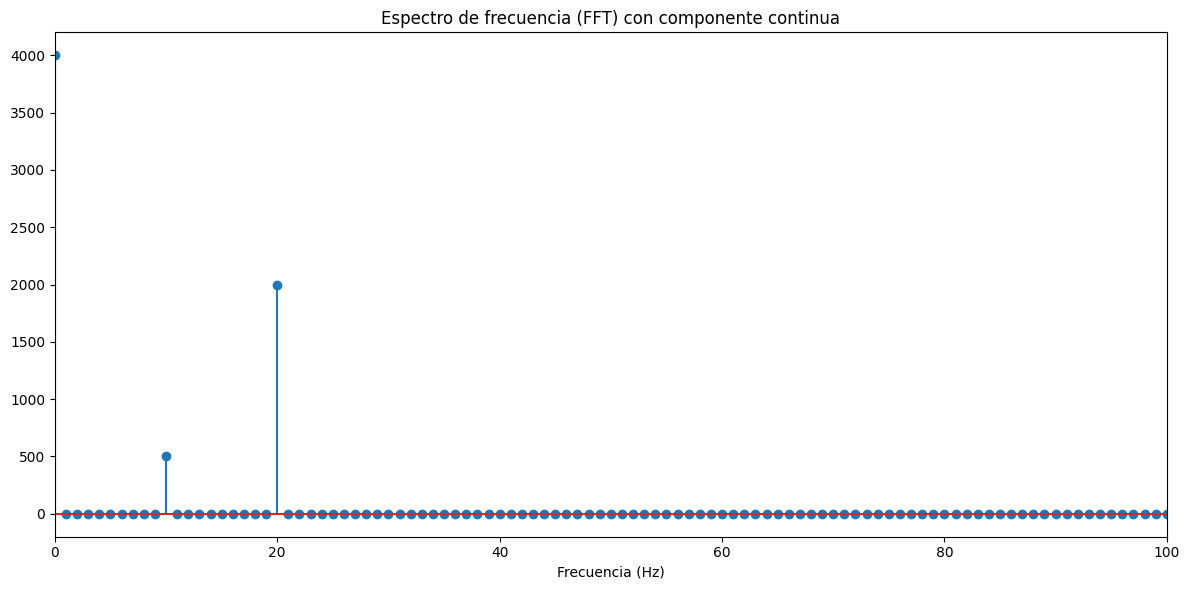

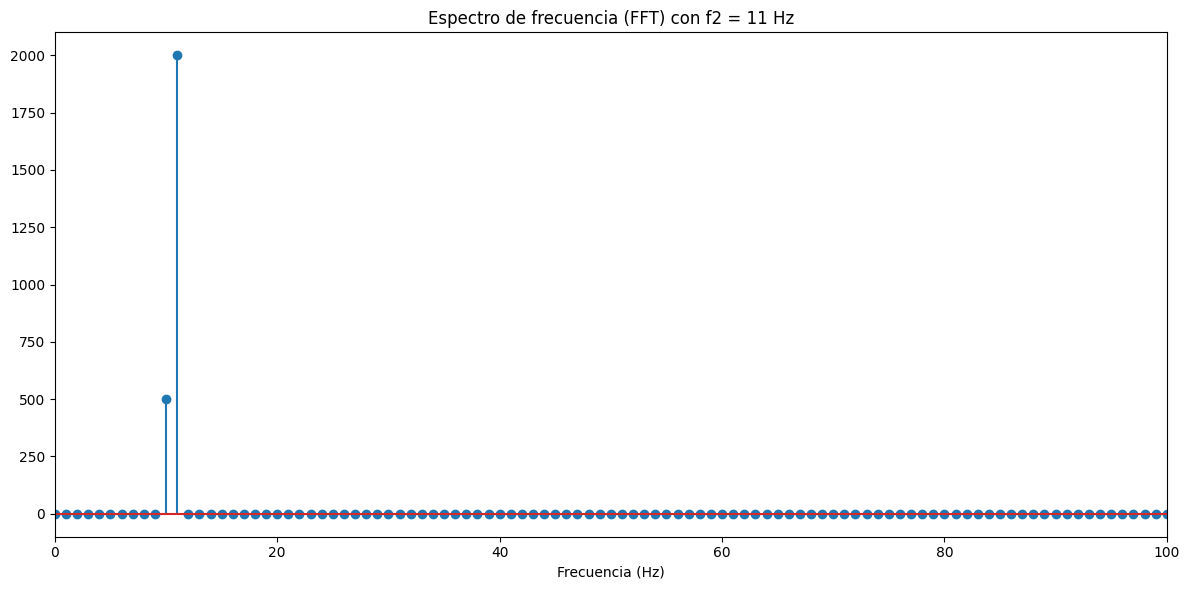

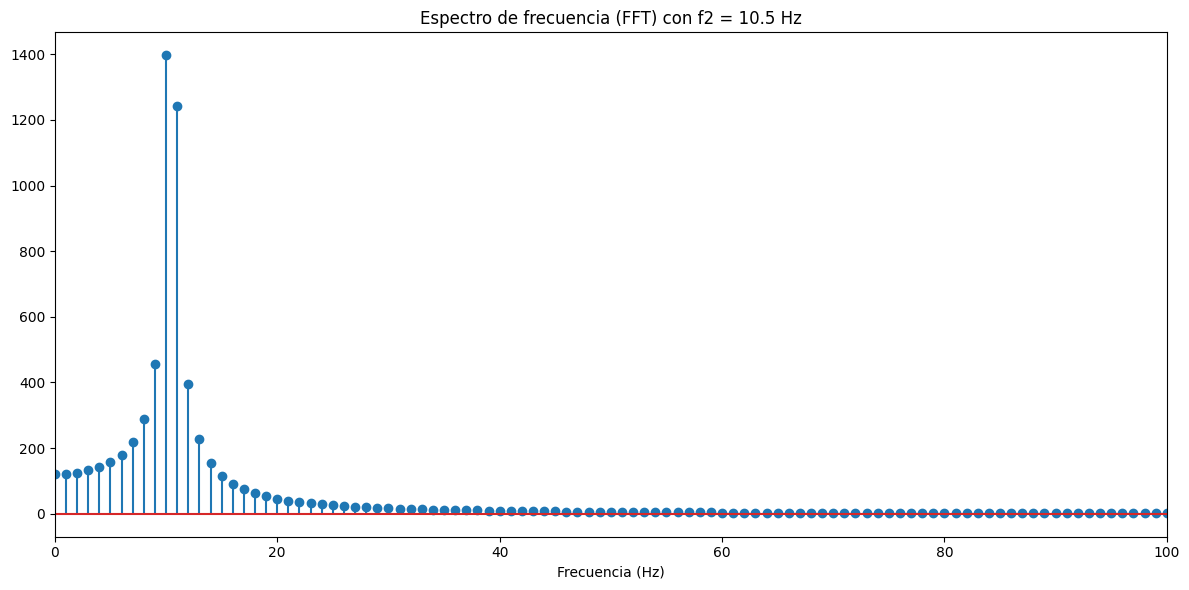

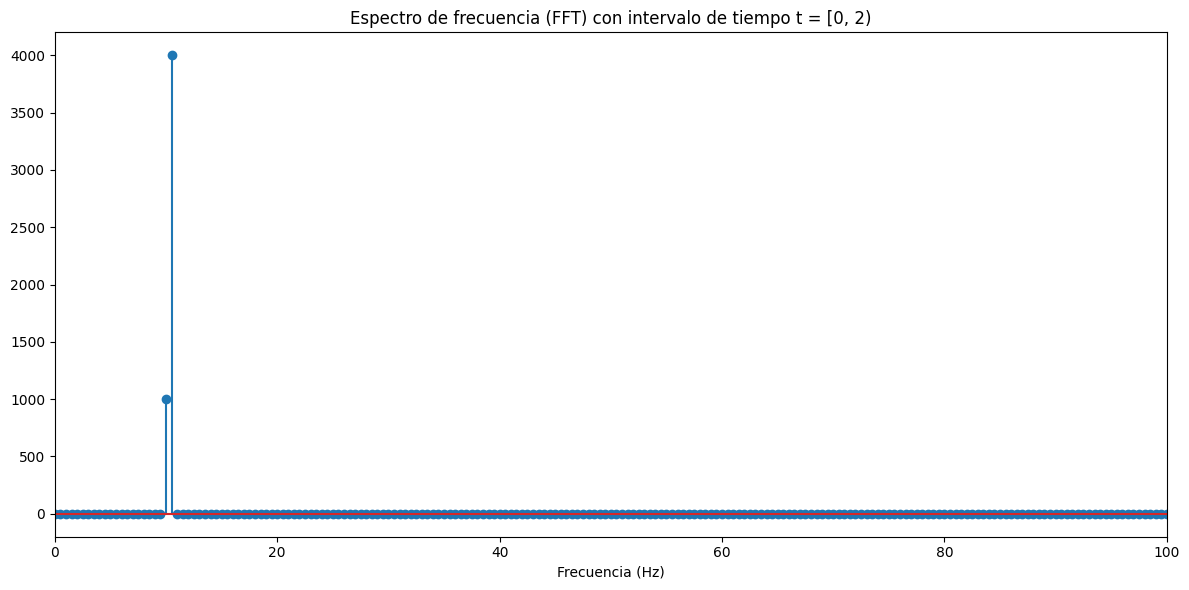

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#===================CONFIGURACIÓN===================
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo desde 0 hasta 1 segundo, con paso 1/fs

#===================GENERACIÓN DE SEÑALES SENOIDES===================
f1 = 10  # Frecuencia de la primera señal (Hz)
f2 = 20  # Frecuencia de la segunda señal (Hz)
s1 = np.sin(2 * np.pi * f1 * t)  # Primera señal seno
s2 = 4*np.sin(2 * np.pi * f2 * t)  # Segunda señal seno

# Suma de ambas señales
s_t = s1 + s2

#===================CÁLCULO Y GRÁFICO DE LA FFT===================
S = np.fft.fft(s_t)  # Transformada Discreta de Fourier (TDF) de la señal
freq = np.fft.fftfreq(len(s_t), 1/fs)  # Vector de frecuencias asociado a la TDF

# Graficar señal en el tiempo y su espectro
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(t, s_t)  # Gráfico de la señal en el dominio del tiempo
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo (s)")

plt.subplot(2, 1, 2)
plt.stem(freq, np.abs(S))  # Magnitud del espectro de frecuencias
plt.title("Espectro de frecuencia (FFT)")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)  # Mostrar hasta 100 Hz
plt.tight_layout()

#===================VERIFICACIÓN DE LA RELACIÓN DE PARSEVAL===================
N = len(s_t)  # Cantidad de muestras

# Energía en el dominio del tiempo
energy_time = np.sum(np.abs(s_t)**2)

# Energía en el dominio de la frecuencia (Parseval)
energy_freq = np.sum(np.abs(S)**2) / N

# Mostrar energías por consola
print(f"Energía en tiempo: {energy_time}")
print(f"Energía en frecuencia: {energy_freq}")

#===================MODIFICACIÓN 1: AGREGAR UN TÉRMINO CONSTANTE===================
s_t2 = s1 + s2 + 4  # Agrego una componente continua (DC)
S2 = np.fft.fft(s_t2)  # FFT de la nueva señal

# Gráfico del nuevo espectro
plt.figure(figsize=(12, 6))
plt.stem(freq, np.abs(S2))
plt.title("Espectro de frecuencia (FFT) con componente continua")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)
plt.tight_layout()

#===================MODIFICACIÓN 2: CAMBIAR f2 A 11 Hz===================
f2 = 11
s2_alt = 4 * np.sin(2 * np.pi * f2 * t)
s_t3 = s1 + s2_alt
S3 = np.fft.fft(s_t3)

# Gráfico del espectro con f2 = 11 Hz
plt.figure(figsize=(12, 6))
plt.stem(freq, np.abs(S3))
plt.title("Espectro de frecuencia (FFT) con f2 = 11 Hz")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)
plt.tight_layout()

#===================MODIFICACIÓN 3: CAMBIAR f2 A 10.5 Hz===================
f2 = 10.5
s2_alt = 4 * np.sin(2 * np.pi * f2 * t)
s_t4 = s1 + s2_alt
S4 = np.fft.fft(s_t4)

# Gráfico del espectro con f2 = 10.5 Hz
plt.figure(figsize=(12, 6))
plt.stem(freq, np.abs(S4))
plt.title("Espectro de frecuencia (FFT) con f2 = 10.5 Hz")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)
plt.tight_layout()

#===================MODIFICACIÓN 4: CAMBIAR INTERVALO DE TIEMPO A 2 s===================
t2 = np.arange(0, 2, 1/fs)  # Nuevo vector de tiempo, ahora hasta 2 segundos
N2 = len(t2)  # Nueva cantidad de muestras
s1_2 = np.sin(2 * np.pi * f1 * t2)
s2_2 = 4 * np.sin(2 * np.pi * f2 * t2)
s_t5 = s1_2 + s2_2
S5 = np.fft.fft(s_t5)
freq2 = np.fft.fftfreq(len(s_t5), 1/fs)

# Gráfico del espectro con intervalo de 2 segundos
plt.figure(figsize=(12, 6))
plt.stem(freq2, np.abs(S5))
plt.title("Espectro de frecuencia (FFT) con intervalo de tiempo t = [0, 2)")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


# Ejercicio base
Se genera una señal compuesta por dos senoidales de diferentes frecuencias.

### ¿Que muestra el espectro? 
Dos picos claramente definidos en $10Hz$ y $20Hz$, siendo el segundo mas alto debido al factor 4 que multiplica esa senoidal.
*La Transformada Discreta de Fourier descompone la señal en sus componentes de frecuencia. Como las frecuencias de las señales son puras, el espectro muestra picos en esas dos frecuencias. La amplitud del pico de $20 Hz$ es mayor porque esa componente tiene mayor amplitud*

### Verficar Parseval
Se espera que ambas energias (Tanto en el tiempo como en la frecuencia) den valores muy similares

*Parseval dice que la energia total de una señal no cambia al pasar del dominio temporal al frecuencial. En el codigo se calcula y se imprime que ambas energias coinciden, lo que confirma la relacion.*

### Agrego un termino constante
Aparece un **pico adicional en $0 Hz$** (Frecuencia continua)
*El termino constante representa una componente continua que se refleja como un valor en la frecuencia cero. Esa componente no estaba antes, por eso un cambio visible en el espectro*

### Cambiar $f_2 = 20 Hz$ por $f2 = 11 Hz$
El segundo pico aparece ahora en $11Hz$ (en vez de $20Hz$) y hay mas cercania entre los dos picos
*Como la nueva frecuencia esta mas cerca de $f_1 = 10 Hz$, las dos senoidales estan mas proximas en frecuencia afectando el contenido espectral pero se siguen viendo picos bien definidos.

### Cambiar $f_2 = 20 Hz$ por $f2 = 10.5 Hz$
Ya no se ven picos bien definidos si no que aparece un patron de interferencia o batimiento (interferencia entre dos frecuencias muy cercanas).
*Al estar las dos frecuencias muy cerca, en lugar de ver dos picos bien separados, se produce una modulacion en el tiempo que en frecuencia se ve como un ensanchamiento o superposicion de picos. No se pueden distinguir claramente las frecuencias.

### Cambiar el intervalo de tiempo a $t = [0,2) Seg.$ 
Los picos del espectro se vuelven mas angostos y definidos. 
*Al analizar una señal durante mas tiempo, se obtiene una mayor resolucion frecuencial. Esto quiere decir que se pueden detectar con mayor precision las frecuencias presentes mejorando la nitidez del espectro.


- La FFT es una herramienta bastante poderosa para analizar la frecuencia de una señal.
- Cambiar amplitudes afecta la altura de los picos del espectro.
- Agregar una componente constante lo vemos reflejado en la frecuencia cero.
- Frecuencias cercanas pueden traer cositas raras.
- Aumentar el tiempo de analisis mejora la resolucion en frecuencia.


<hr>

# Ejercicio 2
Genere: a) una señal senoidal discreta de frecuencia 2 Hz, b) una señal cuadrada periódica de frecuencia 2 Hz, y c) una señal senoidal de frecuencia 4 Hz. Para todas ellas utilice fase cero, una frecuencia de muestreo de 100 Hz, y una duración total de 1 segundo. Con estas señales realice las siguientes operaciones:

1. Verifique si son ortogonales las señales a) y b), a) y c), b) y c). 

2. Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

3. Redefina la señal c), como una senoidal pero de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a la señal a), en ambos dominios.

=====================INCISO 1========================================
Producto punto entre A y B: 63.578179375461225  ->  No ortogonal
Producto punto entre A y C: -1.4897036336467169e-15  ->  Ortogonal
Producto punto entre B y C: 4.440892098500626e-16  ->  Ortogonal
=====================INCISO 2========================================
Producto punto entre fftA y fftB: 6357.817937546122  ->  No ortogonal
Producto punto entre fftA y fftC: 1.5667245239974676e-13  ->  Ortogonal
Producto punto entre fftB y fftC: 1.0128066104013675e-14  ->  Ortogonal
=====================INCISO 3========================================
Producto punto entre Senoidal A y Senoidal C modificada: -5.490595501136372e-15  ->  Ortogonal
Producto punto en el dominio de la frecuencia: 3.0505748784828093e-13  ->  Ortogonal


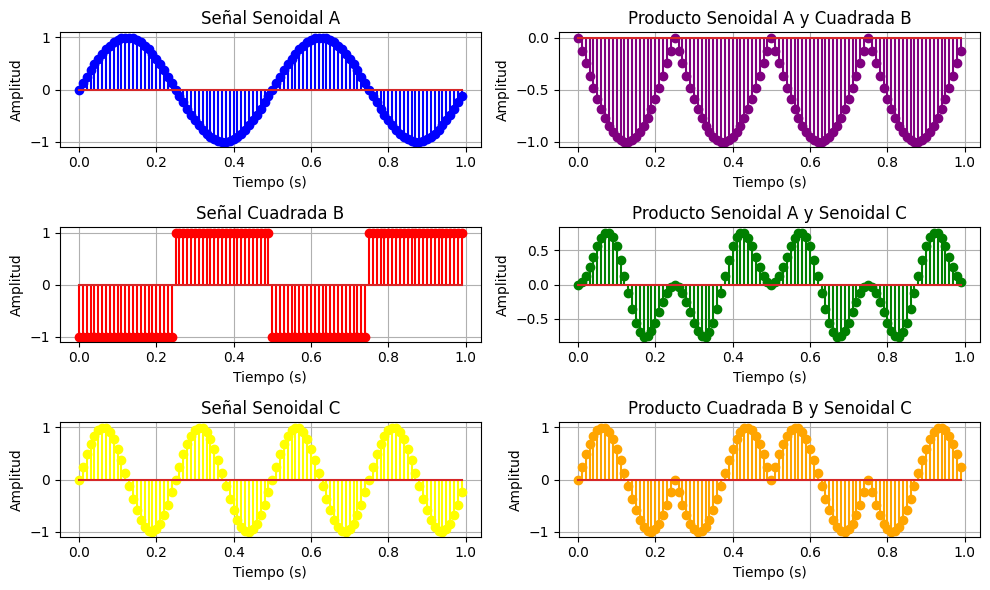

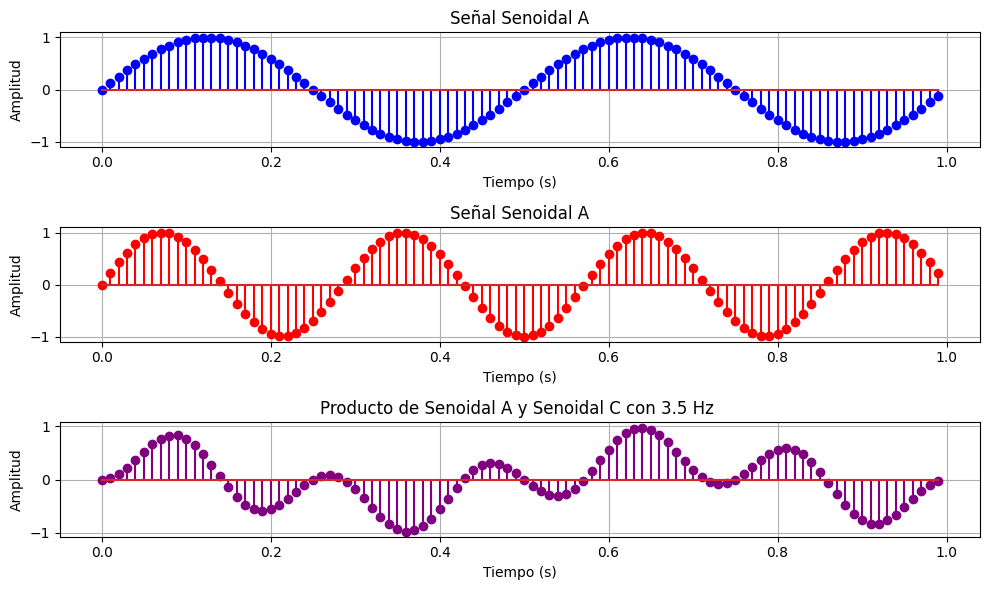

In [9]:
# Solución 2:
import numpy as np
import matplotlib.pyplot as plt

def cuadrada(tinicial, tfinal, fs, fm, phi, A):
    T = 1/fm
    t = np.arange(tinicial,tfinal,T)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*fs*t[i] + phi,2*np.pi) >= np.pi:
            y[i] = -1*A
        else:
            y[i] = 1*A
    return t, y

def senoidal(tinicial, tfinal, fs, fm, phi, A):
    Ts = 1 / fm 
    t = np.arange(tinicial, tfinal, Ts)  
    y = A * np.sin(2 * np.pi * fs * t + phi)  
    return t, y
  
# Definición de parámetros
tinicial = 0  # Tiempo inicial
tfinal = 1.0  # Tiempo final
fsA = 2 # Frecuencia señal Senoidal a
fsB = 2 # Frecuencia señal Cuadrada
fsC = 4 # Frecuencia señal senoidal c
A = 1  # Amplitud de la señal
phi = 0 # Fase de las señales
fm = 100 # Frecuencia de muestreo

[t,yA] = senoidal(tinicial, tfinal, fsA, fm, phi, A)  
[t,yB] = cuadrada(tinicial, tfinal, fsB, fm, phi, A)  
[t,yC] = senoidal(tinicial, tfinal, fsC, fm, phi, A)  



#====================================INCISO 1========================================
producto_puntoAB = yA @ yB # Equivale a: np.dot(yA,yB)
producto_puntoAC = yA @ yC # Equivale a: np.dot(yA,yC)
producto_puntoBC = yB @ yC # Equivale a: np.dot(yB,yC) 

ortogonalAB = np.isclose(producto_puntoAB, 0)
ortogonalAC = np.isclose(producto_puntoAC, 0)
ortogonalBC = np.isclose(producto_puntoBC, 0)
print("=====================INCISO 1========================================")
print("Producto punto entre A y B:", producto_puntoAB, " -> ", "Ortogonal" if ortogonalAB else "No ortogonal")
print("Producto punto entre A y C:", producto_puntoAC, " -> ", "Ortogonal" if ortogonalAC else "No ortogonal")
print("Producto punto entre B y C:", producto_puntoBC, " -> ", "Ortogonal" if ortogonalBC else "No ortogonal")

plt.figure(figsize=(10,6))
plt.subplot(3, 2, 1)
plt.stem(t, yA, linefmt="blue", markerfmt="bo")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 3)
plt.stem(t, -yB, linefmt="red", markerfmt="ro")
plt.title('Señal Cuadrada B')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 5)
plt.stem(t, yC, linefmt="yellow", markerfmt="yellow")
plt.title('Señal Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 2)
plt.stem(t, yA*-yB, linefmt="purple", markerfmt="purple", label='Producto punto A*B')
plt.title('Producto Senoidal A y Cuadrada B')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 4)
plt.stem(t, yA*yC, linefmt="green", markerfmt="go", label='Producto A*C')
plt.title('Producto Senoidal A y Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 6)
plt.stem(t, yB*yC, linefmt="orange", markerfmt="orange", label='Producto B*C')
plt.title('Producto Cuadrada B y Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

#====================================================================================
#====================================INCISO 2========================================
fftA = np.fft.fft(yA) # Transformada de Fourier de la señal Senoidal A
fftB = np.fft.fft(yB) # Transformada de Fourier de la señal Cuadrada B
fftC = np.fft.fft(yC) # Transformada de Fourier de la señal Senoidal C

producto_punto_fft_AB = abs(np.dot(fftA,fftB)) # Equivale a: np.dot(fftA,fftB)
producto_punto_fft_AC = abs(np.dot(fftA,fftC)) # Equivale a: np.dot(fftA,fftC)
producto_punto_fft_BC = abs(np.dot(fftB,fftC)) # Equivale a: np.dot(fftB,fftC) 

ortogonal_fft_AB = np.isclose(producto_punto_fft_AB, 0)
ortogonal_fft_AC = np.isclose(producto_punto_fft_AC, 0)
ortogonal_fft_BC = np.isclose(producto_punto_fft_BC, 0)
print("=====================INCISO 2========================================")
print("Producto punto entre fftA y fftB:", producto_punto_fft_AB, " -> ", "Ortogonal" if ortogonal_fft_AB else "No ortogonal")
print("Producto punto entre fftA y fftC:", producto_punto_fft_AC, " -> ", "Ortogonal" if ortogonal_fft_AC else "No ortogonal")
print("Producto punto entre fftB y fftC:", producto_punto_fft_BC, " -> ", "Ortogonal" if ortogonal_fft_BC else "No ortogonal")


#====================================================================================
#====================================INCISO 3========================================
[t, yC_modificada] = senoidal(tinicial, tfinal, 3.5, fm, phi, A) # Señal senoidal C modificada

plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.stem(t, yA, linefmt="blue", markerfmt="bo")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 1, 2)
plt.stem(t, yC_modificada, linefmt="red", markerfmt="ro")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 1, 3)
plt.stem(t, yA*yC_modificada, linefmt="purple", markerfmt="purple")
plt.title('Producto de Senoidal A y Senoidal C con 3.5 Hz ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

producto_punto = yA @ yC_modificada # Producto punto entre la señal Senoidal A y la modificada C
producto_punto_fft = abs(np.dot(np.fft.fft(yA), np.fft.fft(yC_modificada))) # Producto punto en el dominio de la frecuencia
ortogonal = np.isclose(producto_punto, 0)
ortogonal_fft = np.isclose(producto_punto_fft, 0)

print("=====================INCISO 3========================================")
print("Producto punto entre Senoidal A y Senoidal C modificada:", producto_punto, " -> ", "Ortogonal" if ortogonal else "No ortogonal")
print("Producto punto en el dominio de la frecuencia:", producto_punto_fft , " -> ", "Ortogonal" if ortogonal_fft else "No ortogonal")

#====================================================================================


<hr>

# Ejercicio 3:
Verifique la propiedad de retardo temporal de la transformada discreta de Fourier. Para ello, genere una señal senoidal de 10 Hz, muestreada a 100 Hz durante un segundo. Calcule su transformada de Fourier. Modifique esta última de acuerdo a la ecuación de la propiedad, para generar un retardo de 10 muestras. Antitransforme y verifique el cumplimiento de la propiedad.

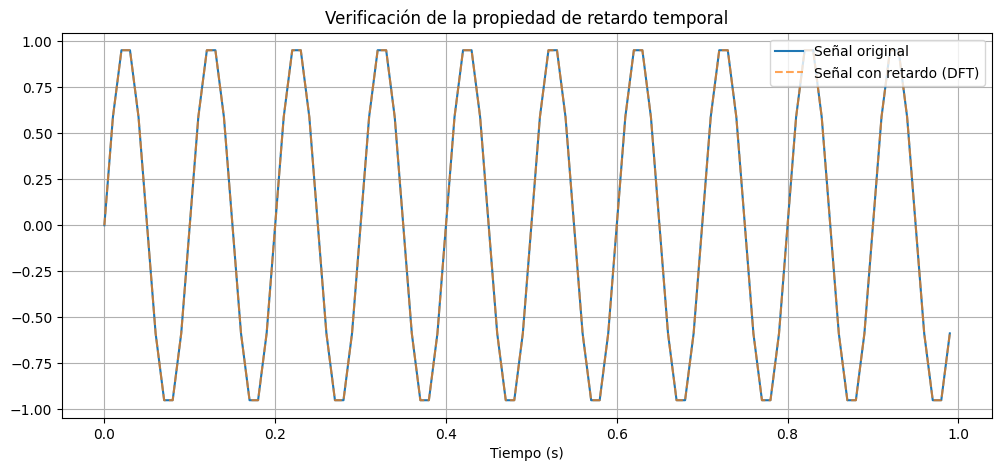

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#===================CONFIGURACIÓN===================
fs = 100  # Frecuencia de muestreo (Hz)
f = 10    # Frecuencia de la señal senoidal (Hz)
T = 1     # Duración en segundos
t = np.arange(0, T, 1/fs)  # Vector de tiempo: de 0 a 1 con paso 1/fs
N = len(t)  # Número total de muestras (debería ser 100)

#===================SEÑAL ORIGINAL===================
x = np.sin(2 * np.pi * f * t)  # Señal senoidal de 10 Hz
X = np.fft.fft(x)              # FFT (Transformada Discreta de Fourier)

#===================RETARDO TEMPORAL===================
n0 = 10  # Retardo deseado en muestras
k = np.arange(N)  # Vector de índices de frecuencia

# Aplico la propiedad de retardo: multiplicación por un factor complejo en frecuencia
X_shifted = X * np.exp(-1j * 2 * np.pi * k * n0 / N)

#===================SEÑAL RETARDADA===================
x_delayed = np.fft.ifft(X_shifted).real  # IFFT: paso de vuelta al dominio temporal

#===================GRAFICAR RESULTADO===================
plt.figure(figsize=(12, 5))
plt.plot(t, x, label="Señal original")
plt.plot(t, x_delayed, '--', label="Señal con retardo (DFT)", alpha=0.7)
plt.title("Verificación de la propiedad de retardo temporal")
plt.xlabel("Tiempo (s)")
plt.legend()
plt.grid()
plt.show()


*Hay que verificar la propiedad de retardo temporal de la transformada discreta de Fourier* 

### Que dice la propiedad de retardo temporal.
Dice que si aplicamos un retardo de $n_0$ muestras en el dominio del tiempo, esto equivale a multiplicar la transformada por un factor complejo de rotacion.
$$ x[n-n_0] \Leftrightarrow X[k].e^{-j \frac{2 \pi k n_0}{N}} $$

Siendo exactamente esto lo que se hace en el codigo.
- Se calcula la FFT de la señal original.
- Se modifica en frecuencia con el factor $e^{\frac{-j 2 \pi k n_0}{N}}$
- Finalmente hacemos la inversa para obtener la señal desplazada en el tiempo

En el codigo esperamos ver dos curvas
- La original (seno de $10Hz$)
- La misma señal desplazada hacia la derecha diez muestras(como un retardo de $0.1 Seg$ porque $f_S = 100 Hz \to $ muestra = $0.01 Seg$)

El grafico debe mostrar esa separacion horizontal entre ambas curvas verificando asi visualmente la propiedad.

*Se verifica (o al menos deberia) verificarse el retardo temporal de la DFT ya que al aplicar el factor complejo $e^{\frac{-j 2 \pi k n_0}{N}}$ en frecuencia, se genera un desplazamiento exacto de $n_0$ muestras en el tiempo. La señal resultante obtenida mediante la transformada inversa muestra ese retardo, lo cual se verifica en el grafico.*

La transformada de Fourier aplica un retardo sin modificar directamente la señal en el tiempo, sino manipulando la fase de sus componentes espectrales

<hr>

# Ejercicio 4:
Las señales verifican que cuanto más concentrada está su energía en cierta región del dominio temporal, más dispersa estará en el dominio frecuencial, y viceversa. Ejemplos extremos de esto son una señal senoidal, que tiene su energía distribuida a lo largo de toda la señal, pero en dominio frecuencial ésta se concentra en la frecuencia de la misma, y un delta de Dirac, que en dominio temporal tiene toda su energía concentrada en un instante, pero en dominio frecuencial contiene todas las frecuencias. Explore esta propiedad utilizando ventanas temporales, más o menos concentradas alrededor de cierto tiempo, y calculando sus respectivas transformadas de Fourier.


In [11]:
# Solución 4:

<hr>

# Ejercicio 5:
La Figura 1 representa la magnitud de la FFT de una señal senoidal de 27 Hz, muestreada durante 1 s y a una frecuencia de muestreo de 50 Hz. La señal muestreada responde a la ecuación $x(t) = 2 \sin(2\pi 27t)$.

1. Determine la frecuencia de la señal que observa. Explique la discrepancia con frecuencia de la señal original.

2. Deduzca una ecuación para determinar cómo se genera la señal de la frecuencia observada, a partir de la frecuencia original y los parámetros del muestreo. Verifique la validez de su ecuación para otras señales, por ejemplo una de 105 Hz.

3. Determine la relación entre la magnitud observada de la transformada y la amplitud de la señal original.

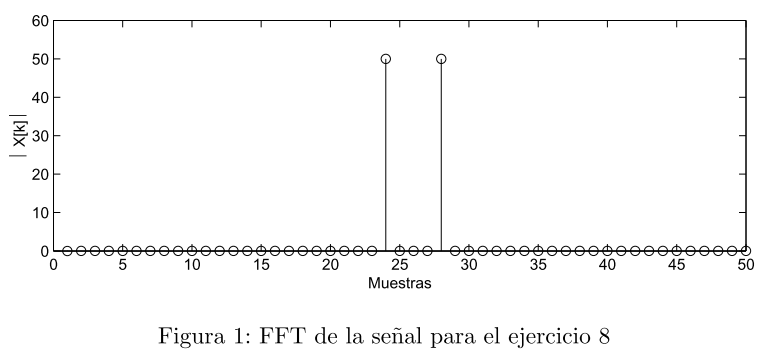

Frecuencia observada: 23.0 Hz
27 Hz -> 23 Hz observada
105 Hz -> 5 Hz observada


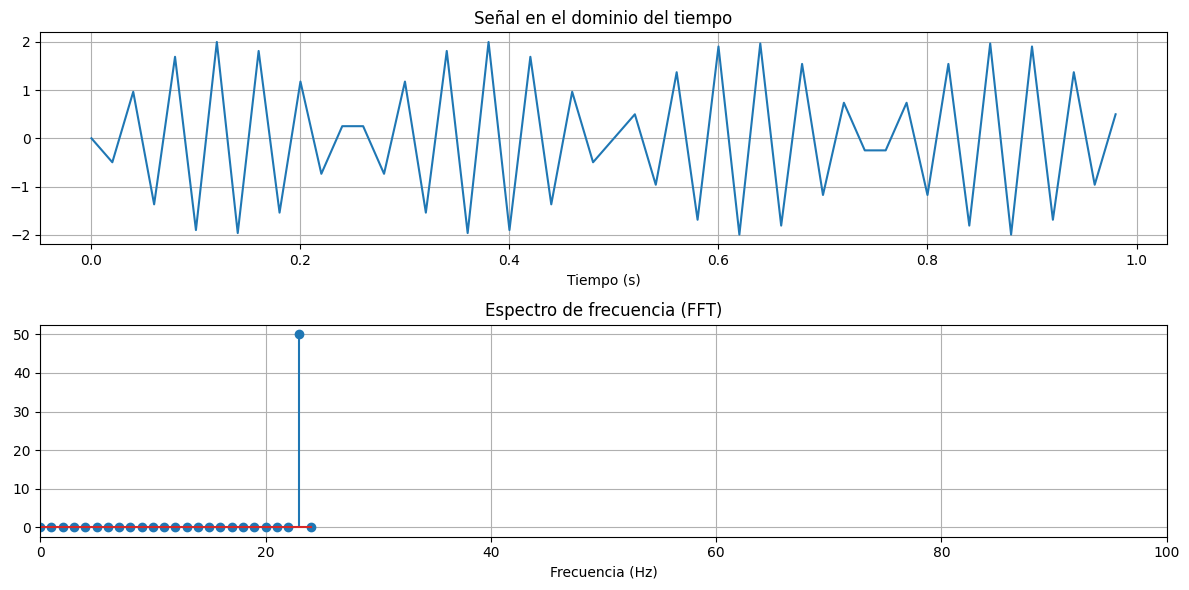

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_frecuencia_observada(f, fs):
    nyquist = fs / 2
    k = round(f / fs)
    f_obs = abs(f - k * fs)
    # Aseguramos que esté dentro del rango [0, nyquist]
    while f_obs > nyquist:
        k = k + 1 if (f - k * fs) > 0 else k - 1
        f_obs = abs(f - k * fs)
    return f_obs

#===================CONFIGURACIÓN===================
fs = 50  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo desde 0 hasta 1 segundo, con paso 1/fs

#===================GENERACIÓN DE SEÑALES SENOIDALES===================
f1 = 27  # Frecuencia de la primera señal (Hz)
s1 = 2*np.sin(2 * np.pi * f1 * t)  # Primera señal seno

#===================CÁLCULO Y GRÁFICO DE LA FFT===================
S = np.fft.fft(s1)  # Transformada Discreta de Fourier (TDF) de la señal
freq = np.fft.fftfreq(len(s1), 1/fs)  # Vector de frecuencias asociado a la TDF
magnitudes = np.abs(S)
idx = np.argmax(magnitudes[:N//2])  # Solo consideramos frecuencias positivas
f_obs = freq[idx]

print(f"Frecuencia observada: {f_obs} Hz")

# Graficar señal en el tiempo y su espectro
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, s1)  # Gráfico de la señal en el dominio del tiempo
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(freq, np.abs(S))  # Magnitud del espectro de frecuencias
plt.title("Espectro de frecuencia (FFT)")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0, 100)  # Mostrar hasta 100 Hz
plt.grid()
plt.tight_layout()

# Verificación para 27 Hz
print(f"27 Hz -> {calcular_frecuencia_observada(27, 50)} Hz observada")

# Verificación para 105 Hz
print(f"105 Hz -> {calcular_frecuencia_observada(105, 50)} Hz observada")

# Explicacion de la discrepancia.
Es por el aliasing causado por una frecuencia de muestreo insuficiente para captura correctamente una de 27 que esta por encima de la frecuencia de Nyquist de 25

# Deduccion de la ecuacion
El aliasing ocurre cuando una frecuencia real $f$ se "superpone" con otra mas baja en el espectro muestreado. 
La frecuencia observable despues del muestreo es la **distancia mas corta entre la frecuencia real y un multiplo de $f_s$**. Es decir, se proyecta sobre $[0,\frac{f_s}{2}]$ por lo que matematicamente queda 
$$f_{obs} = |f - n.f_s|$$ en donde n es el entero mas cercano al cociente entre $f$ y $f_s$. 

Esta ecuacion da una frecuencia aliasada, que se ve igual que la original debido a la naturaleza periodica de la DFT.

Si $f_{obs} > \frac{f_s}{2} entonces hubo aliasing y la frecuencia real fue "reflejada" en el eje.

# Relacion entre magnitud observada y amplitud original
Se quiere ver como es que la DFT representa la energia / amplitud de una senoidal.

Si tenemos una senoidal pura de amplitud $A$ y aplicamos $DFT$ sobre $N$ muestras, la magnitud en la frecuencia correspondiente va a ser

$$DFT[K] \approx \frac{N.A}{2}$$

## Por que se divide por 2?
Porque la señal tiene componentes tanto en $+f$ como en $-f$ en el dominio de Fourier. La DFT concentra esa energia en dos picos simetricos. Cada uno lleva la mitad de la amplitud total.

Se multiplica por N porque la DFT acumula energia de la señal a lo largo de sus N muestras. Es una suma, no un promedio, por eso los resultados crecen proporcionalmente con el numero de muestras.

### Conclusiones inciso 3
Si queres recuperar la amplitud real de la señal a partir de la DFT, tenes que deshacer esa suma, dividiendo por N. Como el pico solo refleja la mitad de la amplitud (por la simetria), tenes que multiplicar por dos.

<hr>

# Ejercicio 6:
La señal que se encuentra en el archivo **necg.txt** corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal.

In [13]:
# Solución 6: